In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import pandas_profiling as pp
from discover_feature_relationships import discover
py.init_notebook_mode(connected=True)

# <i>Importing the dataset with pandas</i>

In [4]:
bank = pd.read_csv('C:\\Users\\rxbro\\Documents\\Capstone 2\\bank-full.csv', sep=';', quoting=3)
bank.head()

"age"           "job"  "marital"  "education" "default"  "balance"  \
0     58    "management"  "married"   "tertiary"      "no"       2143   
1     44    "technician"   "single"  "secondary"      "no"         29   
2     33  "entrepreneur"  "married"  "secondary"      "no"          2   
3     47   "blue-collar"  "married"    "unknown"      "no"       1506   
4     33       "unknown"   "single"    "unknown"      "no"          1   

  "housing" "loan"  "contact"  "day" "month"  "duration"  "campaign"  "pdays"  \
0     "yes"   "no"  "unknown"      5   "may"         261           1       -1   
1     "yes"   "no"  "unknown"      5   "may"         151           1       -1   
2     "yes"  "yes"  "unknown"      5   "may"          76           1       -1   
3     "yes"   "no"  "unknown"      5   "may"          92           1       -1   
4      "no"   "no"  "unknown"      5   "may"         198           1       -1   

   "previous" "poutcome"   "y"  
0           0  "unknown"  "no"  
1           0  "unknown"  "no"  
2           0  "unknown"  "no"  
3           0  "unknown"  "no"  
4           0  "unknown"  "no"

In [5]:
# The values have quotes in them.  We need to replace them with spaces.
new_name = bank.columns.str.replace('"', '')
bank.columns = new_name
bank.head()

age             job    marital    education default  balance housing  \
0   58    "management"  "married"   "tertiary"    "no"     2143   "yes"   
1   44    "technician"   "single"  "secondary"    "no"       29   "yes"   
2   33  "entrepreneur"  "married"  "secondary"    "no"        2   "yes"   
3   47   "blue-collar"  "married"    "unknown"    "no"     1506   "yes"   
4   33       "unknown"   "single"    "unknown"    "no"        1    "no"   

    loan    contact  day  month  duration  campaign  pdays  previous  \
0   "no"  "unknown"    5  "may"       261         1     -1         0   
1   "no"  "unknown"    5  "may"       151         1     -1         0   
2  "yes"  "unknown"    5  "may"        76         1     -1         0   
3   "no"  "unknown"    5  "may"        92         1     -1         0   
4   "no"  "unknown"    5  "may"       198         1     -1         0   

    poutcome     y  
0  "unknown"  "no"  
1  "unknown"  "no"  
2  "unknown"  "no"  
3  "unknown"  "no"  
4  "unknown"  "no"

In [6]:
# Now we need to remove all of the quotes.  We need to better understand our data set.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# To get rid of the quotes in the data, we need to loop over all values and remove the quotes.
# Since integers cannot use string replace, we will need to escape the integer values.
for column in bank.columns:
    if bank[column].dtypes != 'int64':
        bank[column] = bank[column].str.replace('"', ' ')

In [8]:
bank.head()

age             job    marital    education default  balance housing  \
0   58     management    married     tertiary      no      2143    yes    
1   44     technician     single    secondary      no        29    yes    
2   33   entrepreneur    married    secondary      no         2    yes    
3   47    blue-collar    married      unknown      no      1506    yes    
4   33        unknown     single      unknown      no         1     no    

    loan    contact  day  month  duration  campaign  pdays  previous  \
0    no    unknown     5   may        261         1     -1         0   
1    no    unknown     5   may        151         1     -1         0   
2   yes    unknown     5   may         76         1     -1         0   
3    no    unknown     5   may         92         1     -1         0   
4    no    unknown     5   may        198         1     -1         0   

    poutcome     y  
0   unknown    no   
1   unknown    no   
2   unknown    no   
3   unknown    no   
4   unknown    no

EDA begins here.
We need to separate the categorical and numerical features.

In [9]:
cato_var = bank.dtypes.index[np.where(bank.dtypes =='object')].values.tolist()
num_var = bank.dtypes.index[np.where(bank.dtypes != 'object')].values.tolist()

In [12]:
for feq in cato_var:
    print("==**%s**==" % feq)
    print(pd.DataFrame({"freq":bank[feq].value_counts(), "freq_perc":100 * bank[feq].value_counts()/sum(bank[feq].value_counts())}))

==**job**==
                 freq  freq_perc
 blue-collar     9732  21.525735
 management      9458  20.919688
 technician      7597  16.803433
 admin.          5171  11.437482
 services        4154   9.188029
 retired         2264   5.007631
 self-employed   1579   3.492513
 entrepreneur    1487   3.289023
 unemployed      1303   2.882042
 housemaid       1240   2.742695
 student          938   2.074716
 unknown          288   0.637013
==**marital**==
             freq  freq_perc
 married    27214  60.193316
 single     12790  28.289576
 divorced    5207  11.517109
==**education**==
              freq  freq_perc
 secondary   23202  51.319369
 tertiary    13301  29.419831
 primary      6851  15.153392
 unknown      1857   4.107407
==**default**==
        freq  freq_perc
 no    44396  98.197341
 yes     815   1.802659
==**housing**==
        freq  freq_perc
 yes   25130  55.583818
 no    20081  44.416182
==**loan**==
        freq  freq_perc
 no    37967  83.977351
 yes    7244  16.02264

In [13]:
bank['education'] = bank['education'].replace("basic.4y", "basic").replace("basic.6y", "basic").replace("basic.9y", 'basic')

In [14]:
bank['education'].unique()

array([' tertiary ', ' secondary ', ' unknown ', ' primary '],
      dtype=object)

In [20]:
pp.ProfileReport(bank)

In [21]:
classif = ['pday']
df_results = discover.discover(bank, classif)

In [22]:
df_results[df_results['score'] > 0.35]

feature    target     score
221  previous     pdays  0.790322
222  poutcome     pdays  0.435261
237     pdays  previous  0.421444
253     pdays  poutcome  0.894411
254  previous  poutcome  0.909728

From the dataframe above, we can see that pdays is fairly predicted by previous and poutcome.  Also, previous can be well predicted by poutcome.

In [23]:
cm = sns.light_palette("red", as_cmap=True)
df_to_draw = df_results.pivot(index='target', columns='feature', values='score').fillna(1).clip(lower=0).style.background_gradient(cmap=cm, axis=1).set_precision(2)
df_to_draw

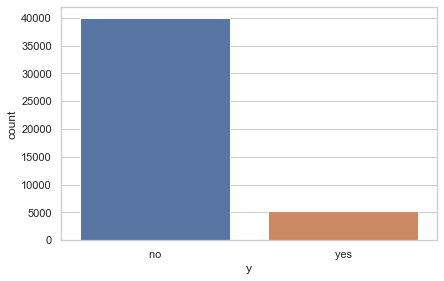

In [25]:
sns.set(style='dark')
sns.set(style='whitegrid', color_codes=True)
sns.countplot(data=bank, x='y')

In [26]:
bank.groupby('y').mean()

age      balance        day    duration  campaign      pdays  \
y                                                                           
 no    40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
 yes   41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

       previous  
y                
 no    0.502154  
 yes   1.170354

<b>From above:</b>
<ol>
    <li>Average age of customer who bought term deposit is higher than those who did not.</li>
    <li>The pdays (number of days since the customer was last contacted) is lower for the customers who did buy it. The lower the pdays, the better the memory of the last call and therefore the better chance of a sale. </li>
    <li>Campaigns (number of contacts or calls made during the current campaign) is lower for customers who did buy the deposit vs. those who did not.</li>
</ol>

In [27]:
bank.groupby('job').mean()

age      balance        day    duration  campaign  \
job                                                                        
 admin.          39.289886  1135.838909  15.564301  246.896732  2.575324   
 blue-collar     40.044081  1078.826654  15.442561  262.901562  2.816995   
 entrepreneur    42.190989  1521.470074  15.702085  256.309348  2.799597   
 housemaid       46.415323  1392.395161  16.002419  245.825000  2.820968   
 management      40.449567  1763.616832  16.114189  253.995771  2.864348   
 retired         61.626767  1984.215106  15.439488  287.361307  2.346731   
 self-employed   40.484484  1647.970868  16.027866  268.157061  2.853072   
 services        38.740250   997.088108  15.635532  259.318729  2.718344   
 student         26.542644  1388.060768  14.897655  246.656716  2.299574   
 technician      39.314598  1252.632092  16.408582  252.904962  2.906805   
 unemployed      40.961627  1521.745971  15.498081  288.543361  2.432080   
 unknown         47.593750  1772.357639  14.642361  237.611111  3.309028   

                     pdays  previous  
job                                   
 admin.          47.859021  0.671630  
 blue-collar     44.033498  0.505138  
 entrepreneur    32.486214  0.478144  
 housemaid       21.505645  0.371774  
 management      38.665468  0.668006  
 retired         37.443905  0.638693  
 self-employed   34.747308  0.551615  
 services        41.995185  0.501204  
 student         57.041578  0.953092  
 technician      37.195077  0.574569  
 unemployed      34.146585  0.466616  
 unknown         20.982639  0.319444

In [28]:
bank.groupby('marital').mean()

age      balance        day    duration  campaign  \
marital                                                               
 divorced   45.782984  1178.872287  15.796428  262.517188  2.630882   
 married    43.408099  1425.925590  15.854487  253.412765  2.842875   
 single     33.703440  1301.497654  15.708210  266.497967  2.649805   

                pdays  previous  
marital                          
 divorced   41.001728  0.551373  
 married    37.950467  0.556552  
 single     44.652385  0.642690

In [29]:
bank.groupby('education').mean()

age      balance        day    duration  campaign  \
education                                                              
 primary     45.865567  1250.949934  15.421398  255.933002  2.834331   
 secondary   39.964270  1154.880786  15.759159  258.685760  2.700802   
 tertiary    39.593640  1758.416435  16.086535  258.518532  2.825577   
 unknown     44.510501  1526.754443  15.810985  257.313947  2.849219   

                 pdays  previous  
education                         
 primary     36.081740  0.489272  
 secondary   42.353504  0.567753  
 tertiary    39.024134  0.661980  
 unknown     36.856220  0.488422

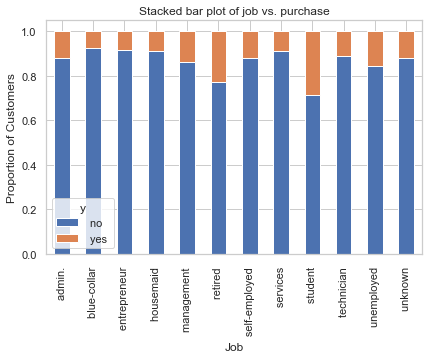

In [31]:
table = pd.crosstab(bank.job, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked bar plot of job vs. purchase')
plt.xlabel('Job')
plt.ylabel('Proportion of Customers')
plt.savefig('Job_vs_purchase_stacked')

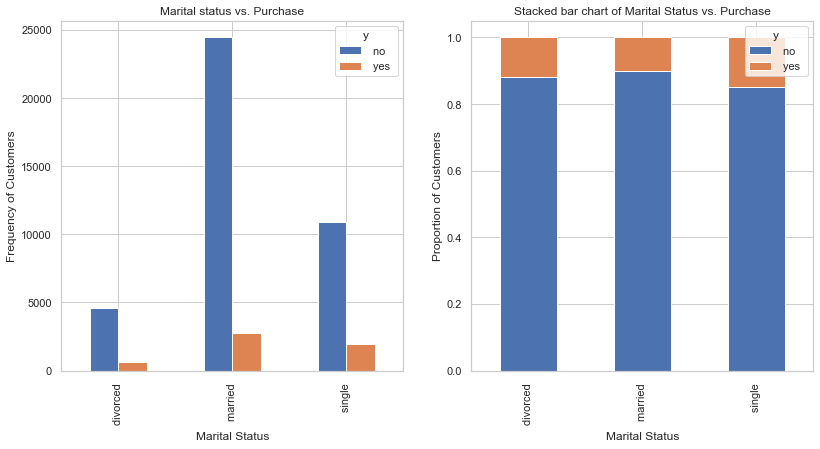

In [34]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1, 2, 1)
table = pd.crosstab(bank.marital, bank.y).plot(kind='bar', ax=ax)
plt.title('Marital status vs. Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Customers')
ax = fig.add_subplot(1, 2, 2)
table = pd.crosstab(bank.marital, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked bar chart of Marital Status vs. Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
fig.savefig('Marital_vs_Purchase_Stacked')

<b>Education vs. Y variable</b>

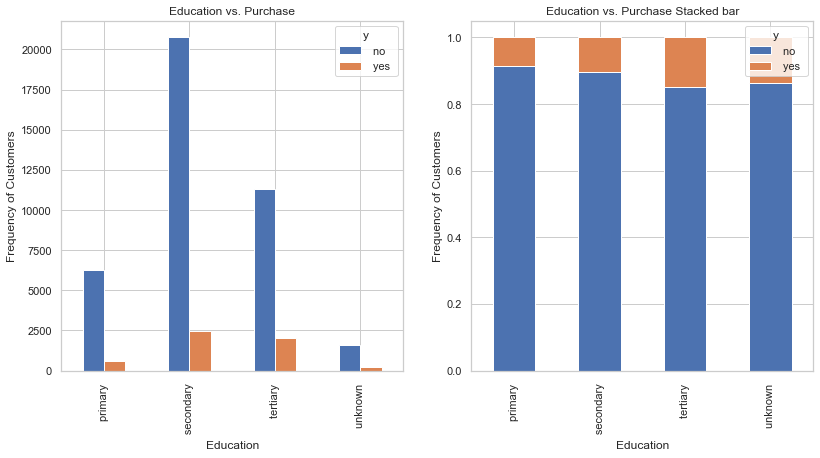

In [36]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
table = pd.crosstab(bank.education, bank.y).plot(kind='bar', ax=ax)
plt.title('Education vs. Purchase')
plt.xlabel('Education')
plt.ylabel('Frequency of Customers')
ax = fig.add_subplot(1, 2, 2)
table = pd.crosstab(bank.education, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Education vs. Purchase Stacked bar')
plt.xlabel('Education')
plt.ylabel('Frequency of Customers')
fig.savefig('Education vs purchase stacked')

## Day of Month vs. Y

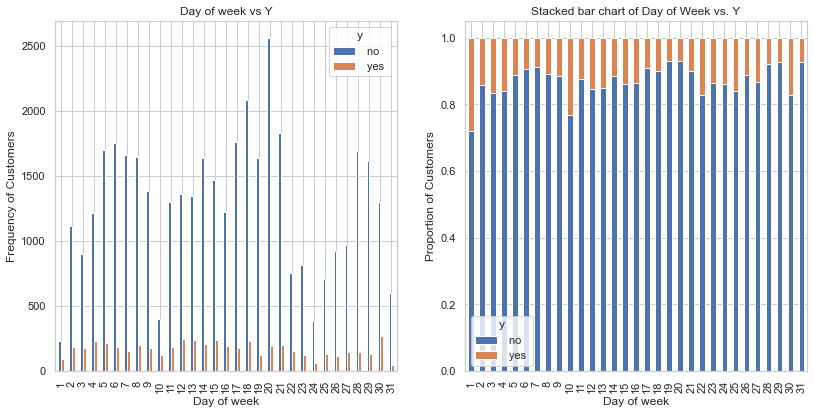

In [38]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
table = pd.crosstab(bank.day, bank.y).plot(kind='bar', ax=ax)
plt.title('Day of month vs Y')
plt.xlabel('Day of month')
plt.ylabel('Frequency of Customers')
ax = fig.add_subplot(1, 2, 2)
table = pd.crosstab(bank.day, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked bar chart of Day of Month vs. Y')
plt.xlabel('Day of month')
plt.ylabel('Proportion of Customers')
fig.savefig('Day of month vs y')

## Month vs. Y

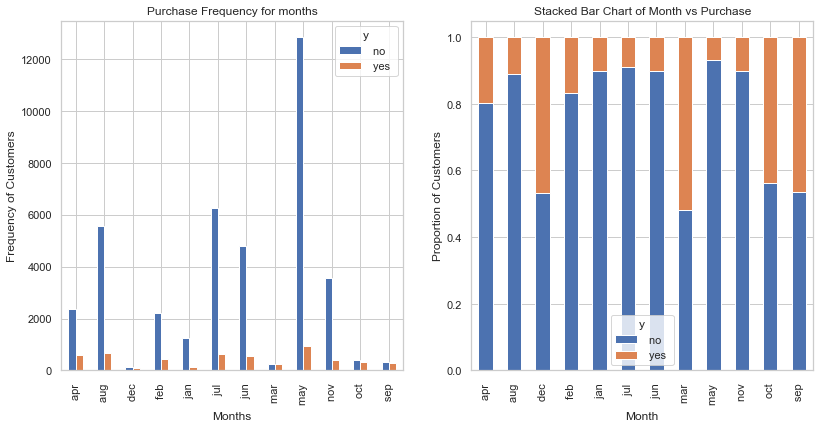

In [39]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
table = pd.crosstab(bank.month, bank.y).plot(kind='bar', ax=ax)
plt.title('Purchase Frequency for months')
plt.xlabel('Months')
plt.ylabel('Frequency of Customers')
ax = fig.add_subplot(1, 2, 2)
table = pd.crosstab(bank.month, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked Bar Chart of Month vs Purchase')
plt.xlabel('Month')
plt.ylabel('Proportion of Customers')
fig.savefig('Month_freq_bar')

As shown above the largest months for purchases are March, October, November, and December.  May has the largest amount of customers.

## poutcome vs. Y

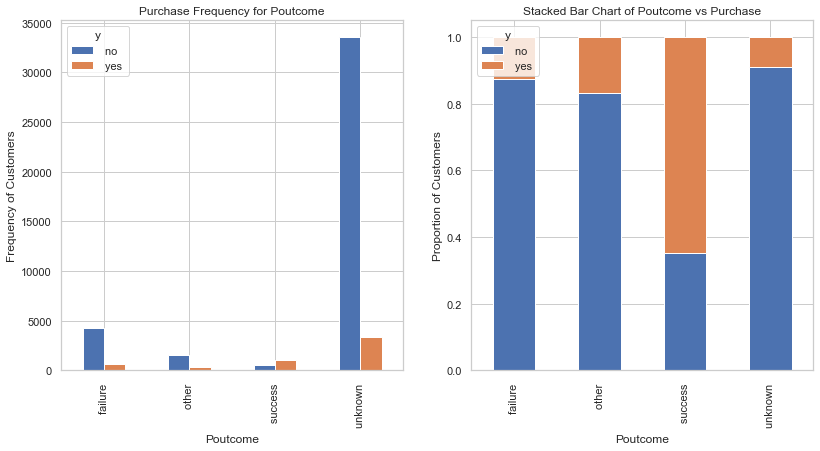

In [40]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
table = pd.crosstab(bank.poutcome, bank.y).plot(kind='bar', ax=ax)
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Customers')
ax = fig.add_subplot(1, 2, 2)
table = pd.crosstab(bank.poutcome, bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Stacked Bar Chart of Poutcome vs Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')
fig.savefig('poutcome_vs_purchase')

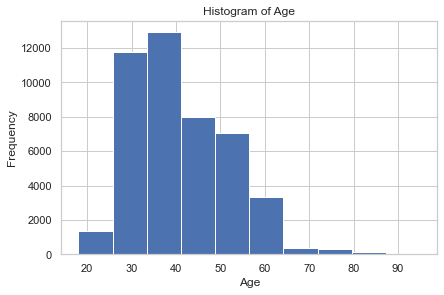

In [41]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Age_hist')

C:\Users\rxbro\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\rxbro\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\rxbro\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

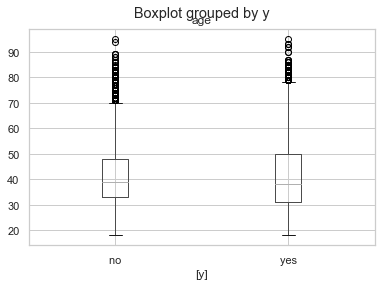

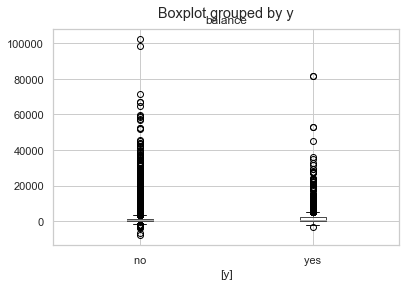

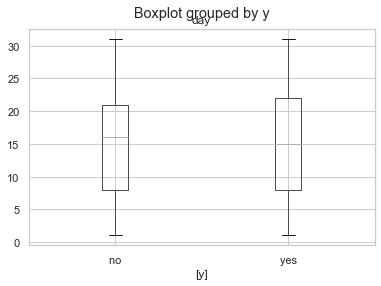

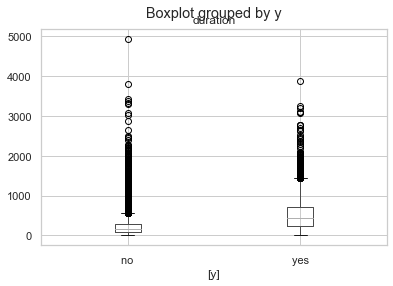

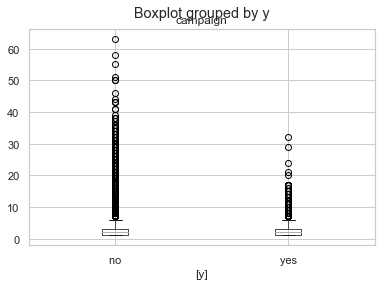

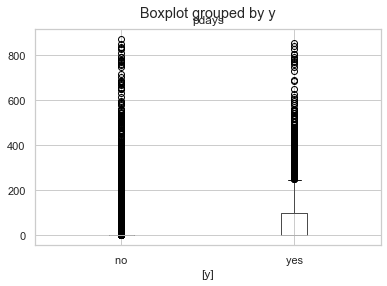

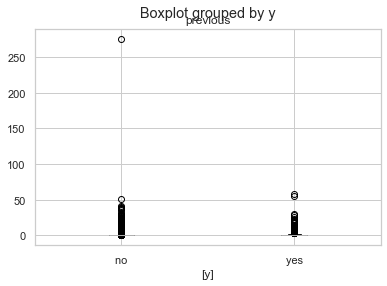

In [42]:
for x in num_var:
    bank[[x, 'y']].boxplot(by='y')

C:\Users\rxbro\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



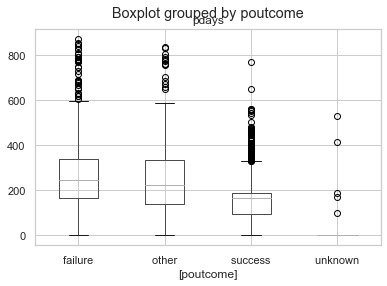

In [43]:
bank[['pdays', 'poutcome']].boxplot(by='poutcome')

## Correlation between numerical values

In [44]:
bank.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

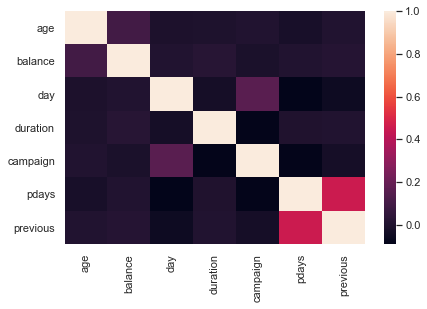

In [45]:
sns.heatmap(bank.corr())

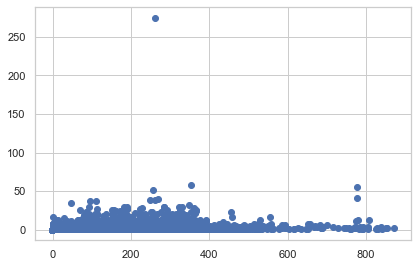

In [46]:
plt.scatter(bank['pdays'], bank['previous'])

### Missing values Sanity Check

In [47]:
bank.marital.value_counts()

 married      27214
 single       12790
 divorced      5207
Name: marital, dtype: int64

In [48]:
bank.job.value_counts()

 blue-collar       9732
 management        9458
 technician        7597
 admin.            5171
 services          4154
 retired           2264
 self-employed     1579
 entrepreneur      1487
 unemployed        1303
 housemaid         1240
 student            938
 unknown            288
Name: job, dtype: int64

### Splitting The Data

In [49]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank, test_size = 0.2, random_state=42)
print('Proportion of training set:\n', train_set['y'].value_counts())
print('Proportion of test set:\n', test_set['y'].value_counts())

Proportion of training set:
  no      31970
 yes      4198
Name: y, dtype: int64
Proportion of test set:
  no      7952
 yes     1091
Name: y, dtype: int64


In [50]:
cato_var.remove('y')

In [51]:
train_set_one_hot = pd.get_dummies(train_set[cato_var])
train_set_one_hot.head()

job_ admin.   job_ blue-collar   job_ entrepreneur   job_ housemaid   \
3344              0                  1                   0                0   
17965             0                  0                   0                0   
18299             1                  0                   0                0   
10221             0                  0                   0                0   
32192             0                  1                   0                0   

       job_ management   job_ retired   job_ self-employed   job_ services   \
3344                  0              0                    0               0   
17965                 0              0                    0               0   
18299                 0              0                    0               0   
10221                 1              0                    0               0   
32192                 0              0                    0               0   

       job_ student   job_ technician   ...  month_ jun   month_ mar   \
3344               0                 0  ...            0            0   
17965              0                 1  ...            0            0   
18299              0                 0  ...            0            0   
10221              0                 0  ...            1            0   
32192              0                 0  ...            0            0   

       month_ may   month_ nov   month_ oct   month_ sep   poutcome_ failure   \
3344             1            0            0            0                   0   
17965            0            0            0            0                   0   
18299            0            0            0            0                   0   
10221            0            0            0            0                   0   
32192            0            0            0            0                   0   

       poutcome_ other   poutcome_ success   poutcome_ unknown   
3344                  0                   0                   1  
17965                 0                   0                   1  
18299                 0                   0                   1  
10221                 0                   0                   1  
32192                 0                   0                   1  

[5 rows x 44 columns]

### Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6D0718850>,
      dtype=object)

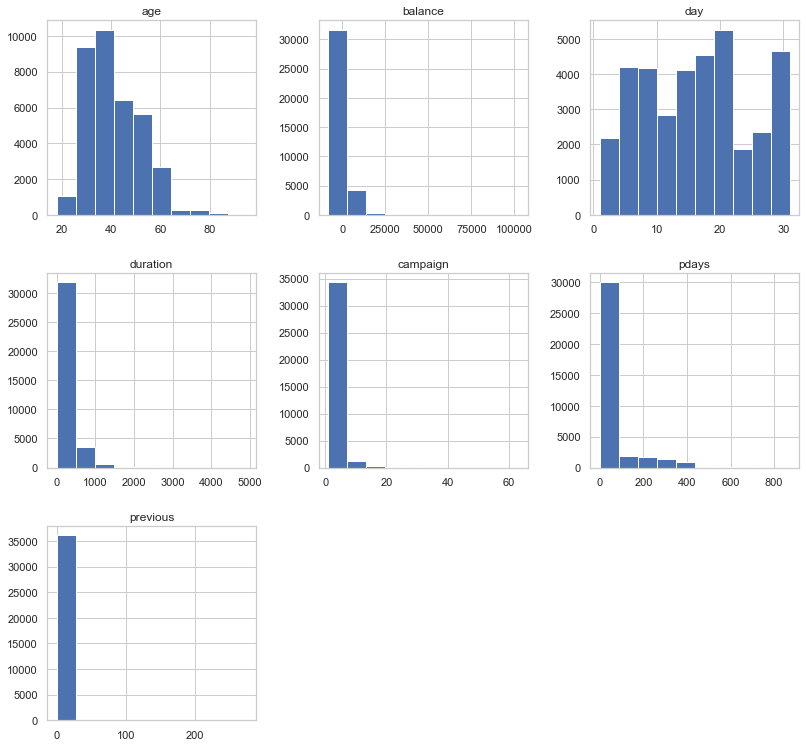

In [52]:
train_set[num_var].hist(figsize=[12, 12])

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
data1 = pd.DataFrame(scaler.fit_transform(train_set[num_var]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6D104AAC0>,
      dtype=object)

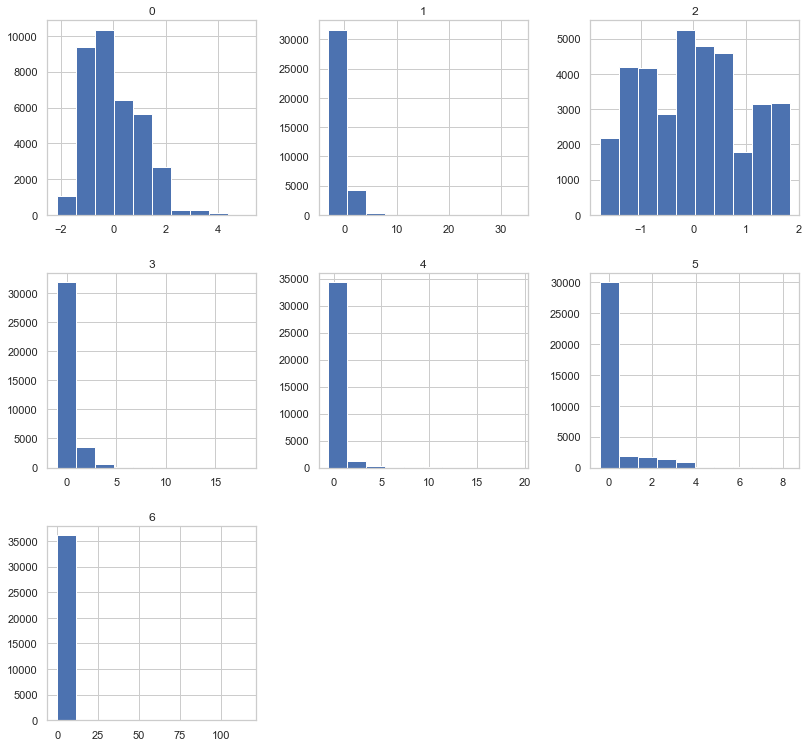

In [55]:
data1.hist(figsize=((12, 12)))

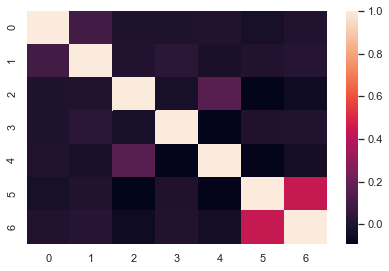

In [56]:
sns.heatmap(data1.corr())